In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [16]:
from sqlalchemy import inspect
inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [73]:
columns_Measurement=inspector.get_columns('measurement')
for c in columns_Measurement:
    print (c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [72]:
columns_Station=inspector.get_columns('station')
for c in columns_Station:
    print (c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [74]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [75]:
Date_Perc=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>'2016-08-23').\
          order_by(Measurement.date.asc()).all()

Date_Perc

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

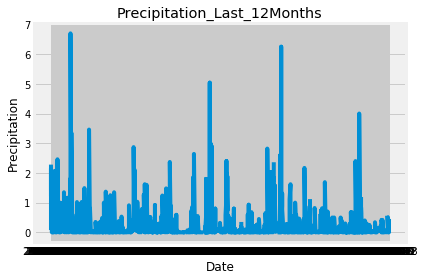

In [76]:
Date=[result[0] for result in Date_Perc]
Perc=[result[1] for result in Date_Perc]

fig, ax = plt.subplots()
ax.plot(Date, Perc)
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation")
ax.set_title("Precipitation_Last_12Months")
fig.tight_layout()
plt.show()


In [77]:
# Calculate the date 1 year ago from the last data point in the database
import datetime as dt
from datetime import datetime
session.query(Measurement.date).order_by(Measurement.date.asc()).first()
#Last_Date:'2010-01-01'
Last_Date_1yr=dt.date(2010,1,1)-dt.timedelta(days=365)
Last_Date_1yr.strftime("%Y-%m-%d")

'2009-01-01'

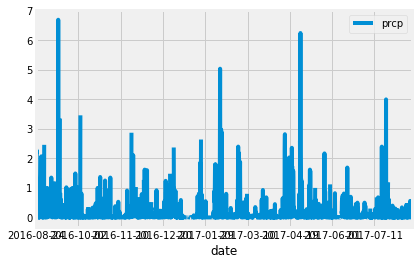

In [132]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

conn=engine.connect()
df_Measurement_ALL=pd.read_sql("Select * from Measurement",conn)
df_Measurement=df_Measurement_ALL[df_Measurement_ALL['date']>'2016-08-23']
df_Measurement.index=df_Measurement.date
df_Measurement=df_Measurement.sort_index(ascending=True)
df_Measurement.head()

df_Measurement.plot(y='prcp', use_index=True)
plt.show()

In [133]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_Measurement['prcp'].describe().reset_index()

,index,prcp
0,count,2015.000000
1,mean,0.176462
2,std,0.460288
3,min,0.000000
4,25%,0.000000
5,50%,0.020000
6,75%,0.130000
7,max,6.700000


In [134]:
# Design a query to show how many stations are available in this dataset?
df_Station=pd.read_sql("Select * from station",conn)
len(df_Station.id.unique())

9

In [248]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

df_Measurement_ALL_Active=df_Measurement_ALL.groupby(['station']).agg({'station':'count'}).rename(
                    columns={'station':'Station_Count'}).reset_index().sort_values('Station_Count',ascending=False)
df_Measurement_ALL_Active

,station,Station_Count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [255]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
df_Measurement_ALL[df_Measurement_ALL.station=='USC00519281'].groupby(['station']).agg(
    {'tobs':['min','max','mean']})

tobs                 
              min   max       mean
station                           
USC00519281  54.0  85.0  71.663781

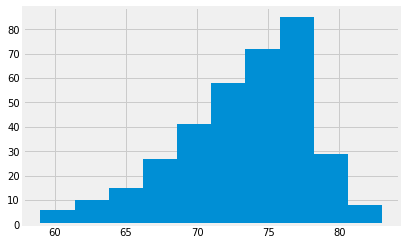

In [263]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df_Measurement_Active_Staiton=df_Measurement_ALL[(df_Measurement_ALL.station=='USC00519281')&
                   (df_Measurement_ALL.date>'2016-08-23')]
df_Measurement_Active_Staiton['tobs'].hist()
plt.show()


In [243]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [262]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2012-10-27', '2012-11-02'))

[(64.0, 73.2, 81.0)]


In [268]:
tobs_error = df_Measurement_Active_Staiton['tobs'].max()-df_Measurement_Active_Staiton['tobs'].min()

Text(0.5, 1.0, 'Trip Avg Temp')

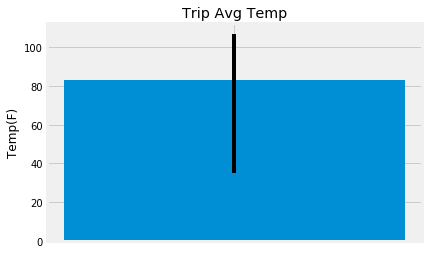

In [276]:

fig, ax = plt.subplots()
ax.bar('',df_Measurement_Active_Staiton['tobs'], yerr=tobs_error)
ax.set_ylabel('Temp(F)')
ax.set_title('Trip Avg Temp')

In [281]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

df_Measurement_ALL_Trip=df_Measurement_ALL[df_Measurement_ALL['date'].between('2012-10-27','2012-11-02')].groupby(
    ['station']).agg({'prcp':'sum'}).reset_index().sort_values('prcp',ascending=False)
df_Measurement_ALL_Trip

,station,prcp
3,USC00516128,1.42
8,USC00519523,0.28
6,USC00519281,0.25
1,USC00513117,0.10
7,USC00519397,0.08
0,USC00511918,0.05
2,USC00514830,0.05
4,USC00517948,0.00
5,USC00518838,0.00


In [283]:
df_Station[df_Station['station'].isin(df_Measurement_ALL_Trip.station.unique())]

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


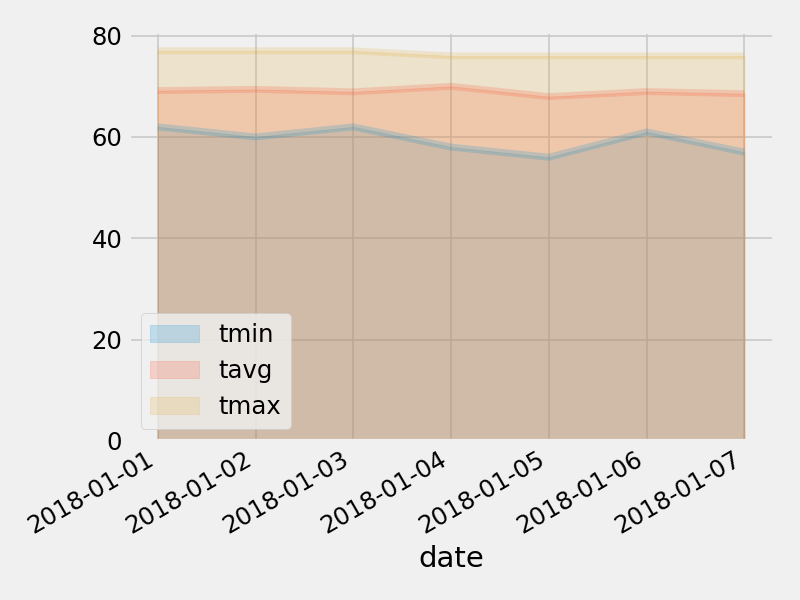

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
